In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
pwd

'C:\\Users\\ibrah\\Dropbox\\FORDHAM_SCHOOL_STUFF\\DATA MINING\\final_project'

In [3]:
data = pd.read_csv("census-income.data.csv")

In [4]:
features = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']


In [5]:
data.columns = features

In [6]:
data.replace(" ?",np.nan,inplace=True)

In [7]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
data = data[data['workclass'].notnull()]
data = data[data['occupation'].notnull()]
data = data[data['native-country'].notnull()]


In [9]:
data_lt50k = data[data["income"]==" <=50K"]
len(data_lt50k)


22653

In [10]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3720
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
data_lt=data_lt50k.head(10000)

In [12]:
data_gt = data[data["income"]==" >50K"]

In [13]:
frames = [data_lt,data_gt]

In [14]:
data_f = pd.concat(frames)

In [15]:
data_f["income"].value_counts(' <=50K')

 <=50K    0.571167
 >50K     0.428833
Name: income, dtype: float64

In [16]:
data_f["marital-status"].value_counts()

 Married-civ-spouse       9802
 Never-married            4522
 Divorced                 2133
 Separated                 455
 Widowed                   400
 Married-spouse-absent     179
 Married-AF-spouse          17
Name: marital-status, dtype: int64

In [18]:
data_f.replace([' Divorced', ' Married-AF-spouse', 
              ' Married-civ-spouse', ' Married-spouse-absent', 
              ' Never-married',' Separated',' Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [19]:
data_f["relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [22]:
data_f.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,not married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
exp_df = data_f
exp_df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [24]:

exp_df['marital-status']= exp_df['marital-status'].map({'married':1,'not married':0})


In [25]:
exp_df.replace([' Self-emp-not-inc',' Self-emp-inc',' Federal-gov',' State-gov',' Local-gov'],
               [' Self-emp', ' Self-emp', ' Gov', ' Gov', ' Gov',],inplace=True)

In [26]:
exp_df.replace([' Assoc-voc',' Assoc-voc',' Assoc-acdm',' Bachelors',' Some-college',' Masters',' Prof-school',' 11th',' 9th',' 7th-8th',' 5th-6th', ' 10th', ' Preschool', ' 1st-4th', ' 12th'],
               [' Bachelors Level',' Bachelors Level',' Bachelors Level',' Bachelors Level',' Bachelors',' Masters Level',' Masters','Pre School-12th','Pre School-12th','Pre School-12th','Pre School-12th','Pre School-12th','Pre School-12th','Pre School-12th','Pre School-12th'],inplace=True)



In [27]:
exp_df['education']=exp_df['education'].map({ 'Pre School-12th':1,' HS-grad':2, ' Bachelors Level':3, ' Masters Level':4})


In [28]:
exp_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp,83311,3.0,13,1,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,2.0,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,1.0,7,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,3.0,13,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,4.0,14,1,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [32]:
occupation_df = pd.get_dummies(exp_df['occupation'])

In [33]:
exp_new = pd.concat([exp_df,occupation_df],axis=1)

In [34]:
exp_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,50,Self-emp,83311,3.0,13,1,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,0
1,38,Private,215646,2.0,9,0,Handlers-cleaners,Not-in-family,White,Male,...,0,1,0,0,0,0,0,0,0,0
2,53,Private,234721,1.0,7,1,Handlers-cleaners,Husband,Black,Male,...,0,1,0,0,0,0,0,0,0,0
3,28,Private,338409,3.0,13,1,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,1,0,0,0,0
4,37,Private,284582,4.0,14,1,Exec-managerial,Wife,White,Female,...,0,0,0,0,0,0,0,0,0,0


In [35]:
race_df = pd.get_dummies(exp_new['race'])

In [36]:
exp_new = pd.concat([exp_new,race_df],axis=1)

In [37]:
sex_df = pd.get_dummies(exp_new['sex'])


In [38]:
exp_new = pd.concat([exp_new,sex_df],axis=1)

In [39]:
exp_new.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander',
       ' Black', ' Other', ' White', ' Female', ' Male'],
      dtype='object')

In [40]:
workclass_df = pd.get_dummies(exp_new['workclass'])
exp_new = pd.concat([exp_new,workclass_df],axis=1)

In [41]:
country_df = pd.get_dummies(exp_new['native-country'])
exp_new = pd.concat([exp_new,country_df],axis=1)


In [42]:
relationship_df = pd.get_dummies(exp_new['relationship'])


In [43]:
exp_new= pd.concat([exp_new,relationship_df],axis=1)

In [44]:
exp_new['income']=exp_new['income'].map({ ' >50K':1,' <=50K':0})


In [45]:
exp_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,50,Self-emp,83311,3.0,13,1,Exec-managerial,Husband,White,Male,...,0,1,0,0,1,0,0,0,0,0
1,38,Private,215646,2.0,9,0,Handlers-cleaners,Not-in-family,White,Male,...,0,1,0,0,0,1,0,0,0,0
2,53,Private,234721,1.0,7,1,Handlers-cleaners,Husband,Black,Male,...,0,1,0,0,1,0,0,0,0,0
3,28,Private,338409,3.0,13,1,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,1
4,37,Private,284582,4.0,14,1,Exec-managerial,Wife,White,Female,...,0,1,0,0,0,0,0,0,0,1


In [46]:
data_final = exp_new.copy()
data_final=data_final.select_dtypes(['number'])

In [47]:
data_final.head(20)

,age,fnlwgt,education,education-num,marital-status,capital-gain,capital-loss,hours-per-week,income,Adm-clerical,...,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,50,83311,3.0,13,1,0,0,13,0,0,...,0,1,0,0,1,0,0,0,0,0
1,38,215646,2.0,9,0,0,0,40,0,0,...,0,1,0,0,0,1,0,0,0,0
2,53,234721,1.0,7,1,0,0,40,0,0,...,0,1,0,0,1,0,0,0,0,0
3,28,338409,3.0,13,1,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,1
4,37,284582,4.0,14,1,0,0,40,0,0,...,0,1,0,0,0,0,0,0,0,1
5,49,160187,1.0,5,1,0,0,16,0,0,...,0,0,0,0,0,1,0,0,0,0
11,23,122272,3.0,13,0,0,0,30,0,1,...,0,1,0,0,0,0,0,1,0,0
12,32,205019,3.0,12,0,0,0,50,0,0,...,0,1,0,0,0,1,0,0,0,0
14,34,245487,1.0,4,1,0,0,45,0,0,...,0,0,0,0,1,0,0,0,0,0
15,25,176756,2.0,9,0,0,0,35,0,0,...,0,1,0,0,0,0,0,1,0,0


In [48]:
from scipy.stats import zscore


In [49]:
data_final['age']=data_final['age'].pipe(zscore)
data_final['fnlwgt']=data_final['fnlwgt'].pipe(zscore)
data_final['hours-per-week']=data_final['hours-per-week'].pipe(zscore)

In [50]:
data_final = data_final.drop('education',1)

In [51]:
data_final.head()

,age,fnlwgt,education-num,marital-status,capital-gain,capital-loss,hours-per-week,income,Adm-clerical,Armed-Forces,...,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0.799489,-1.012279,13,1,0,0,-2.466639,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,-0.141548,0.252564,9,0,0,0,-0.182655,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1.034749,0.434880,7,1,0,0,-0.182655,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,-0.925746,1.425918,13,1,0,0,-0.182655,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.219968,0.911446,14,1,0,0,-0.182655,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model


In [53]:
class_label = data_final['income']

In [54]:
cols=list(data_final.columns)
cols.remove('income')
features = data_final[cols]

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation

predicted = cross_validation.cross_val_predict(LogisticRegression(), features, class_label, cv=10)

print(metrics.accuracy_score(class_label, predicted))



print(metrics.classification_report(class_label, predicted)) 


C:\Users\ibrah\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.804774960018
             precision    recall  f1-score   support

          0       0.83      0.83      0.83     10000
          1       0.77      0.77      0.77      7508

avg / total       0.80      0.80      0.80     17508



In [56]:
from nltk import ConfusionMatrix
print (ConfusionMatrix(list(class_label), list(predicted)))

  |    0    1 |
--+-----------+
0 |<8312>1688 |
1 | 1730<5778>|
--+-----------+
(row = reference; col = test)



In [57]:
feats= list(data_final.columns)
target = list("income")


In [58]:

from sklearn.feature_selection import RFE

# load the iris datasets

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(features, class_label)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False False False False False  True False
 False False  True  True  True False False False False False False False
  True False False False False False False False False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False]
[29 57 38  1 68 66 28 52 60 65  1  6  2 10  1  1  1 26 40  3 47 12 56 22  1
 23  5 37 35 34 32 61 30 17 21  1 24  1 64 51 15 11 13 25 55 67 48 69 46 36
 53 16 14 62 44 58 43 49 42 31 45 50 54 39 59 20 33 27 63 18 19  9 41  8  1
  1  7  4]


In [59]:
# for loop to select features for N range
selection_range = len(list(features.columns))
features_dict = {}
column_names = list(features.columns)

for i in range(1,selection_range+1):
    model = LogisticRegression()
    rfe = RFE(model, i)
    rfe.fit(features, class_label)
    column_selection = rfe.support_

    selected_features = [i for indx, i in enumerate(column_names) if column_selection[indx] == True]
    features_dict[i] = selected_features
        


In [60]:
# for loop to run algorithm for all N features 
model_outputs = {}
for k, v in features_dict.items():
    sliced_features = features[v]
    predicted = cross_validation.cross_val_predict(LogisticRegression(), sliced_features, class_label, cv=10)
    model_outputs[k] = [metrics.accuracy_score(class_label, predicted)]
    #print(metrics.classification_report(class_label, predicted)) 

In [61]:
model_outputs

{1: [0.73577793008910208],
 2: [0.73726296550148507],
 3: [0.73766278272789587],
 4: [0.73766278272789587],
 5: [0.73766278272789587],
 6: [0.73789124971441622],
 7: [0.73840530043408725],
 8: [0.74040438656614116],
 9: [0.75017135023989034],
 10: [0.75108521818597218],
 11: [0.75565455791638103],
 12: [0.75559744116975092],
 13: [0.75559744116975092],
 14: [0.75673977610235321],
 15: [0.76256568425862459],
 16: [0.76239433401873424],
 17: [0.76399360292437746],
 18: [0.76387936943111723],
 19: [0.76879140964130688],
 20: [0.76873429289467676],
 21: [0.76862005940141653],
 22: [0.76867717614804665],
 23: [0.76873429289467676],
 24: [0.76862005940141653],
 25: [0.76856294265478642],
 26: [0.76839159241489607],
 27: [0.77050491204021021],
 28: [0.7704477952935801],
 29: [0.77027644505368975],
 30: [0.77010509481379941],
 31: [0.77016221156042952],
 32: [0.7708476125199909],
 33: [0.77090472926662101],
 34: [0.77090472926662101],
 35: [0.77113319625314147],
 36: [0.77113319625314147],
 37

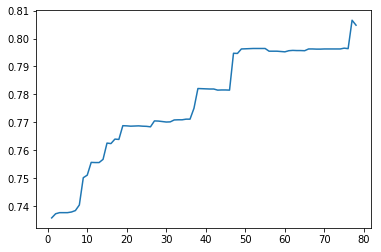

In [62]:
df = pd.DataFrame(model_outputs)
plt.plot(df.transpose())

In [63]:
column_names = list(features.columns)
column_selection = rfe.support_

In [64]:
selected_features = [i for indx, i in enumerate(column_names) if column_selection[indx] == True]

In [65]:
sliced_features = features[selected_features]

In [66]:
predicted = cross_validation.cross_val_predict(LogisticRegression(), sliced_features, class_label, cv=10)

print(metrics.accuracy_score(class_label, predicted))



print(metrics.classification_report(class_label, predicted)) 

0.804774960018
             precision    recall  f1-score   support

          0       0.83      0.83      0.83     10000
          1       0.77      0.77      0.77      7508

avg / total       0.80      0.80      0.80     17508



In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [68]:
k_best = SelectKBest(f_classif, k=50).fit_transform(features, class_label)

## k_best.shape

In [69]:
predicted = cross_validation.cross_val_predict(LogisticRegression(), k_best, class_label, cv=10)

print(metrics.accuracy_score(class_label, predicted))



print(metrics.classification_report(class_label, predicted)) 

0.805803061458
             precision    recall  f1-score   support

          0       0.83      0.83      0.83     10000
          1       0.78      0.77      0.77      7508

avg / total       0.81      0.81      0.81     17508



In [70]:
k_best.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


neigh = KNeighborsClassifier(n_neighbors=40)
neigh.fit(features, class_label) 

KNeighborsClassifier(...)
knn_pred = cross_validation.cross_val_predict(neigh, features, class_label, cv=5)
knn_pred=neigh.predict(features)
accuracy_score(class_label,knn_pred)


In [ ]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features, class_label, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())